# Price Laptops Analyst


Before us is an analysis of data that includes a number of laptop parameters along with their price. The main question we want to answer is: what parameters influence the final price the most?

There are several stages ahead of us:

#### 1. Data exploration and visualization

    - we will see the basic statistics of numerical features
    - we will see graphs showing the relationship between numeric and categorical features with the 'Price' feature

#### 2. Construction of a linear regression model

    - we will build the model using all the features
    - we will look at whether all the features are significant

#### 3. Construction of the Random Forest Regression Model

    - we will check whether the results of the model will be improved
    - we will see an explanation of the model

#### 4. Summary

    - conclusions and recommendations


In [1]:
# import basic library using to analyst

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading cleaning data

data = pd.read_csv('.\\data\\cleaning_data.csv')
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,ResolutionType,Touchscreen,IPS,CpuSpeed,CpuMark,MemoryGB,MemoryKind,Price
364,Lenovo,Netbook,11.6,1366x768,4.0,Intel,Windows 10,1.59,HD,No,Yes,1.1,Intel,128.0,SSD,29463.8400
1208,Lenovo,Notebook,15.6,1920x1080,6.0,AMD,Windows 10,2.20,Full HD,No,No,3.6,AMD,256.0,SSD,31838.5296
1037,Dell,Gaming,15.6,3840x2160,16.0,Nvidia,Windows 10,3.21,4K Ultra HD,No,No,2.6,Intel,256.0,SSD,70809.1200
1245,Dell,Notebook,15.6,1366x768,2.0,Intel,Windows 10,2.20,HD,No,No,1.6,Intel,500.0,HDD,20193.1200
163,HP,Notebook,13.3,1920x1080,4.0,Intel,Windows 10,1.49,Full HD,No,Yes,1.6,Intel,500.0,HDD,40173.1200
925,Asus,2 in 1 Convertible,12.5,1920x1080,8.0,Intel,Chrome OS,1.20,Full HD,No,No,1.2,Intel,64.0,Flash,61751.5200
979,HP,Notebook,14.0,1366x768,4.0,Intel,Windows 10,1.64,HD,No,No,2.4,Intel,500.0,HDD,36443.5200
983,HP,Ultrabook,14.0,1920x1080,8.0,Intel,Windows 10,1.54,Full HD,No,No,2.5,Intel,256.0,SSD,100550.5488
686,Acer,2 in 1 Convertible,13.3,1920x1080,1.0,Intel,Windows 10,1.60,Full HD,Yes,Yes,1.6,Intel,256.0,SSD,53226.7200
138,Toshiba,Notebook,15.6,1366x768,4.0,Intel,Windows 10,2.10,HD,No,No,2.3,Intel,500.0,HDD,32074.5600


In [3]:
# shape a table adn basic statistics for numeric features

print(data.shape)
data.describe().T

(1270, 16)


,count,mean,std,min,25%,50%,75%,max
Inches,1270.0,15.131890,1.955256,10.1000,14.00,15.60,15.6000,35.60
Ram,1270.0,8.457480,5.566930,1.0000,4.00,8.00,8.0000,64.00
Weight,1270.0,2.077677,0.808377,0.0002,1.50,2.04,2.3200,11.10
CpuSpeed,1270.0,2.298598,0.507204,0.9000,2.00,2.50,2.7000,3.60
MemoryGB,1270.0,448.563780,366.822280,8.0000,256.00,256.00,512.0000,2048.00
Price,1270.0,59886.072669,37323.784300,9270.7200,31914.72,52054.56,79303.8168,324954.72


### Data visualization

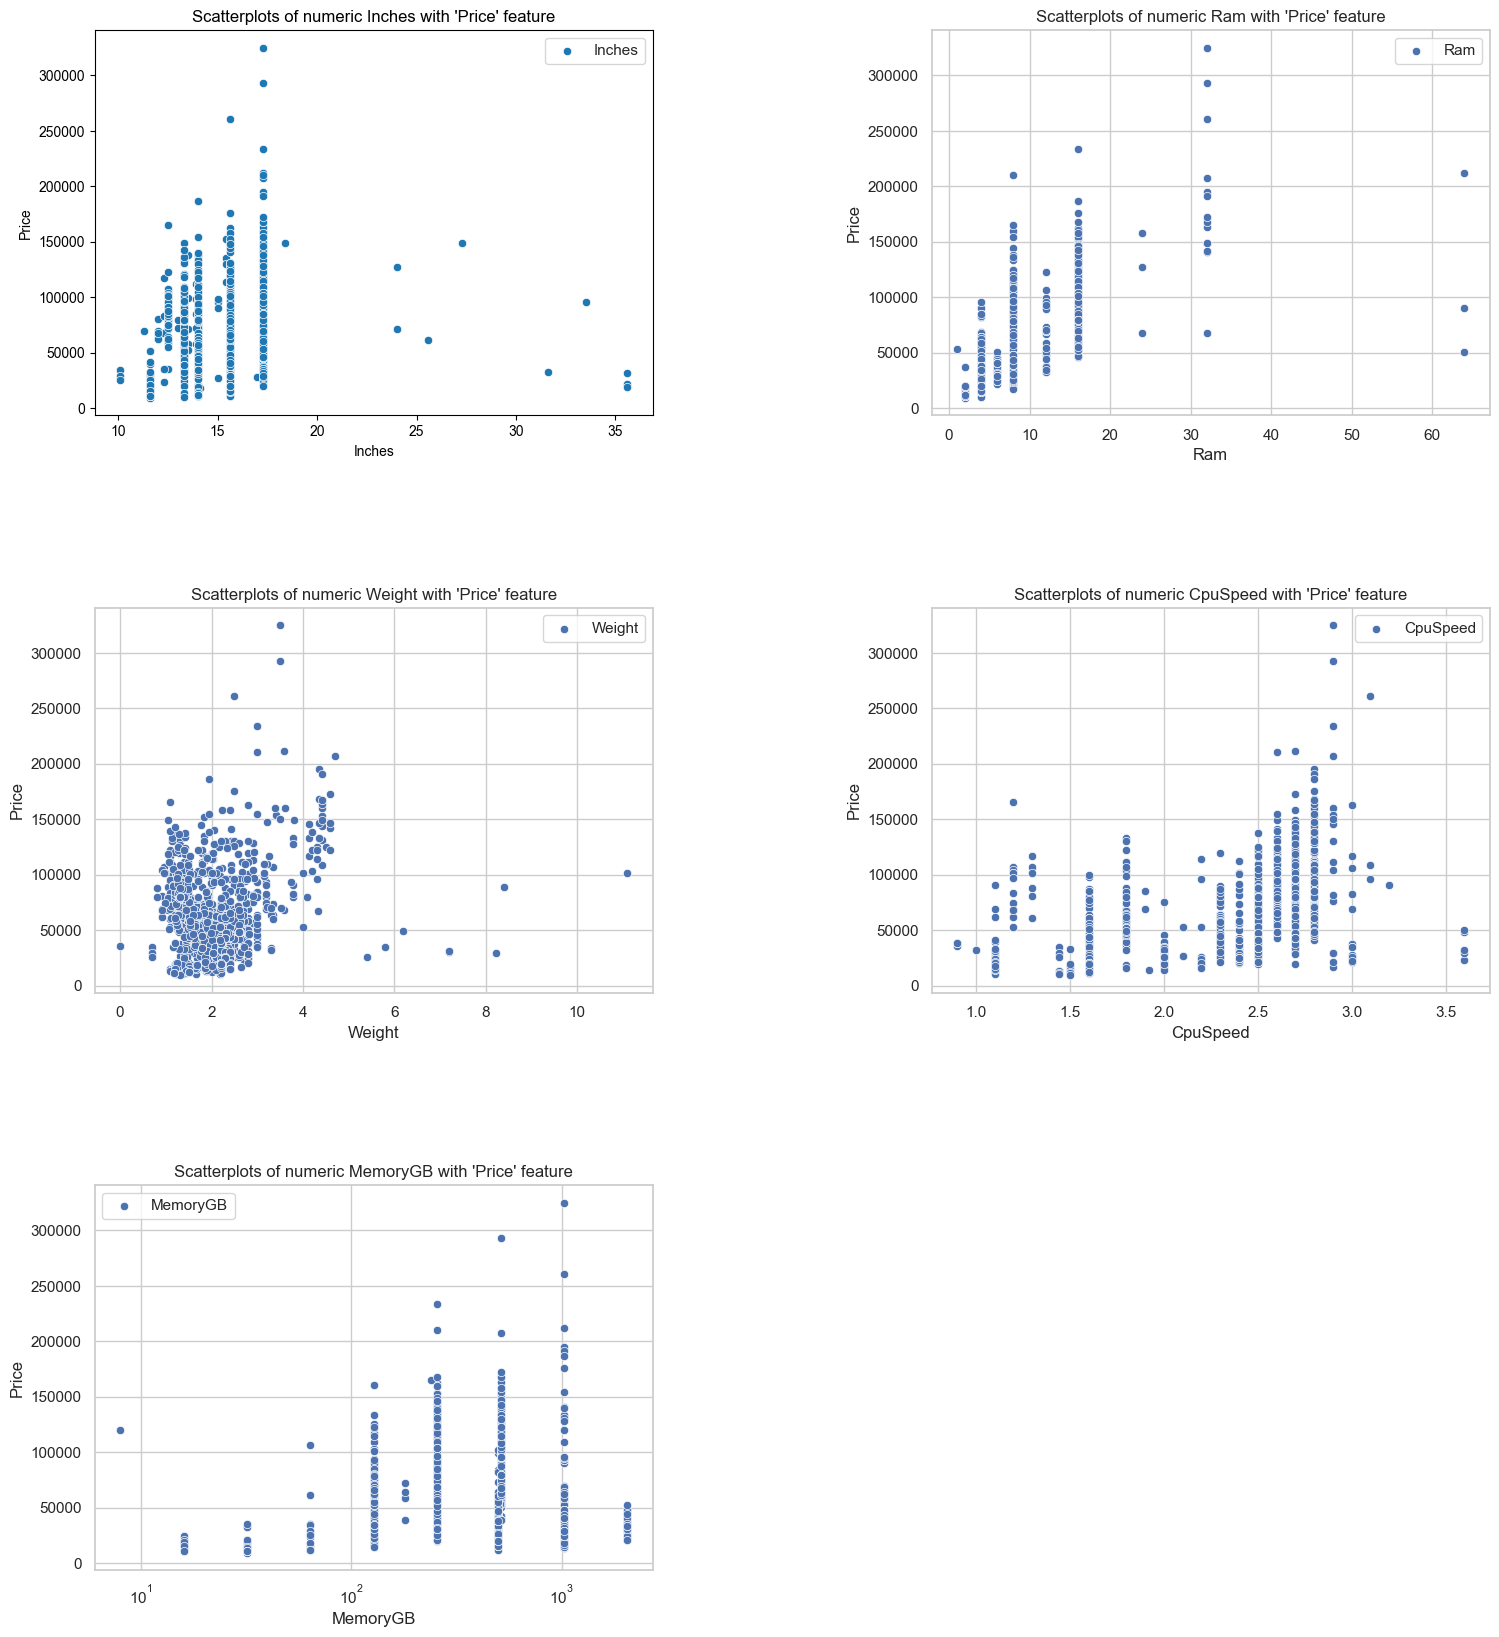

In [4]:
# Let's display scatterplots showing the relationship between numeric features and feature 'Price'

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    if cols == 'MemoryGB':
        plt.xscale('log')
    sns.scatterplot(x=cols, y='Price', data=data, label=cols)
    plt.ylabel('Price')
    plt.title(f"Scatterplots of numeric {cols} with 'Price' feature")
plt.show()

#### Conclussions

We see that the rare of features is not clearly correlated with the 'Price' predicted variable. 
On the other hand, there are also noticeable tendencies of increase in the value of the 'Price' variable along with increases in the describing features. 

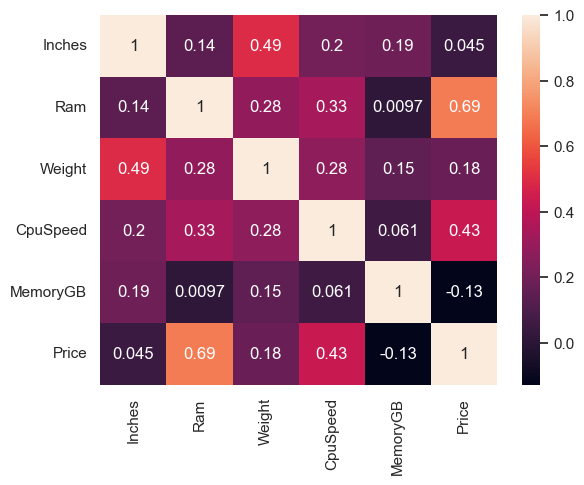

In [5]:
# Let's see the Pearson correlation matrix between numeric variables.

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Conclussions
We see two important things:
- there is a significant correlation between the 'Ram' and 'Price' variables
- the correlation of the 'Inches', 'Weight' and 'Memory_GB' variables with the 'Price' variable is less than 0.2. 

These are the features we will potentially exclude from the model.

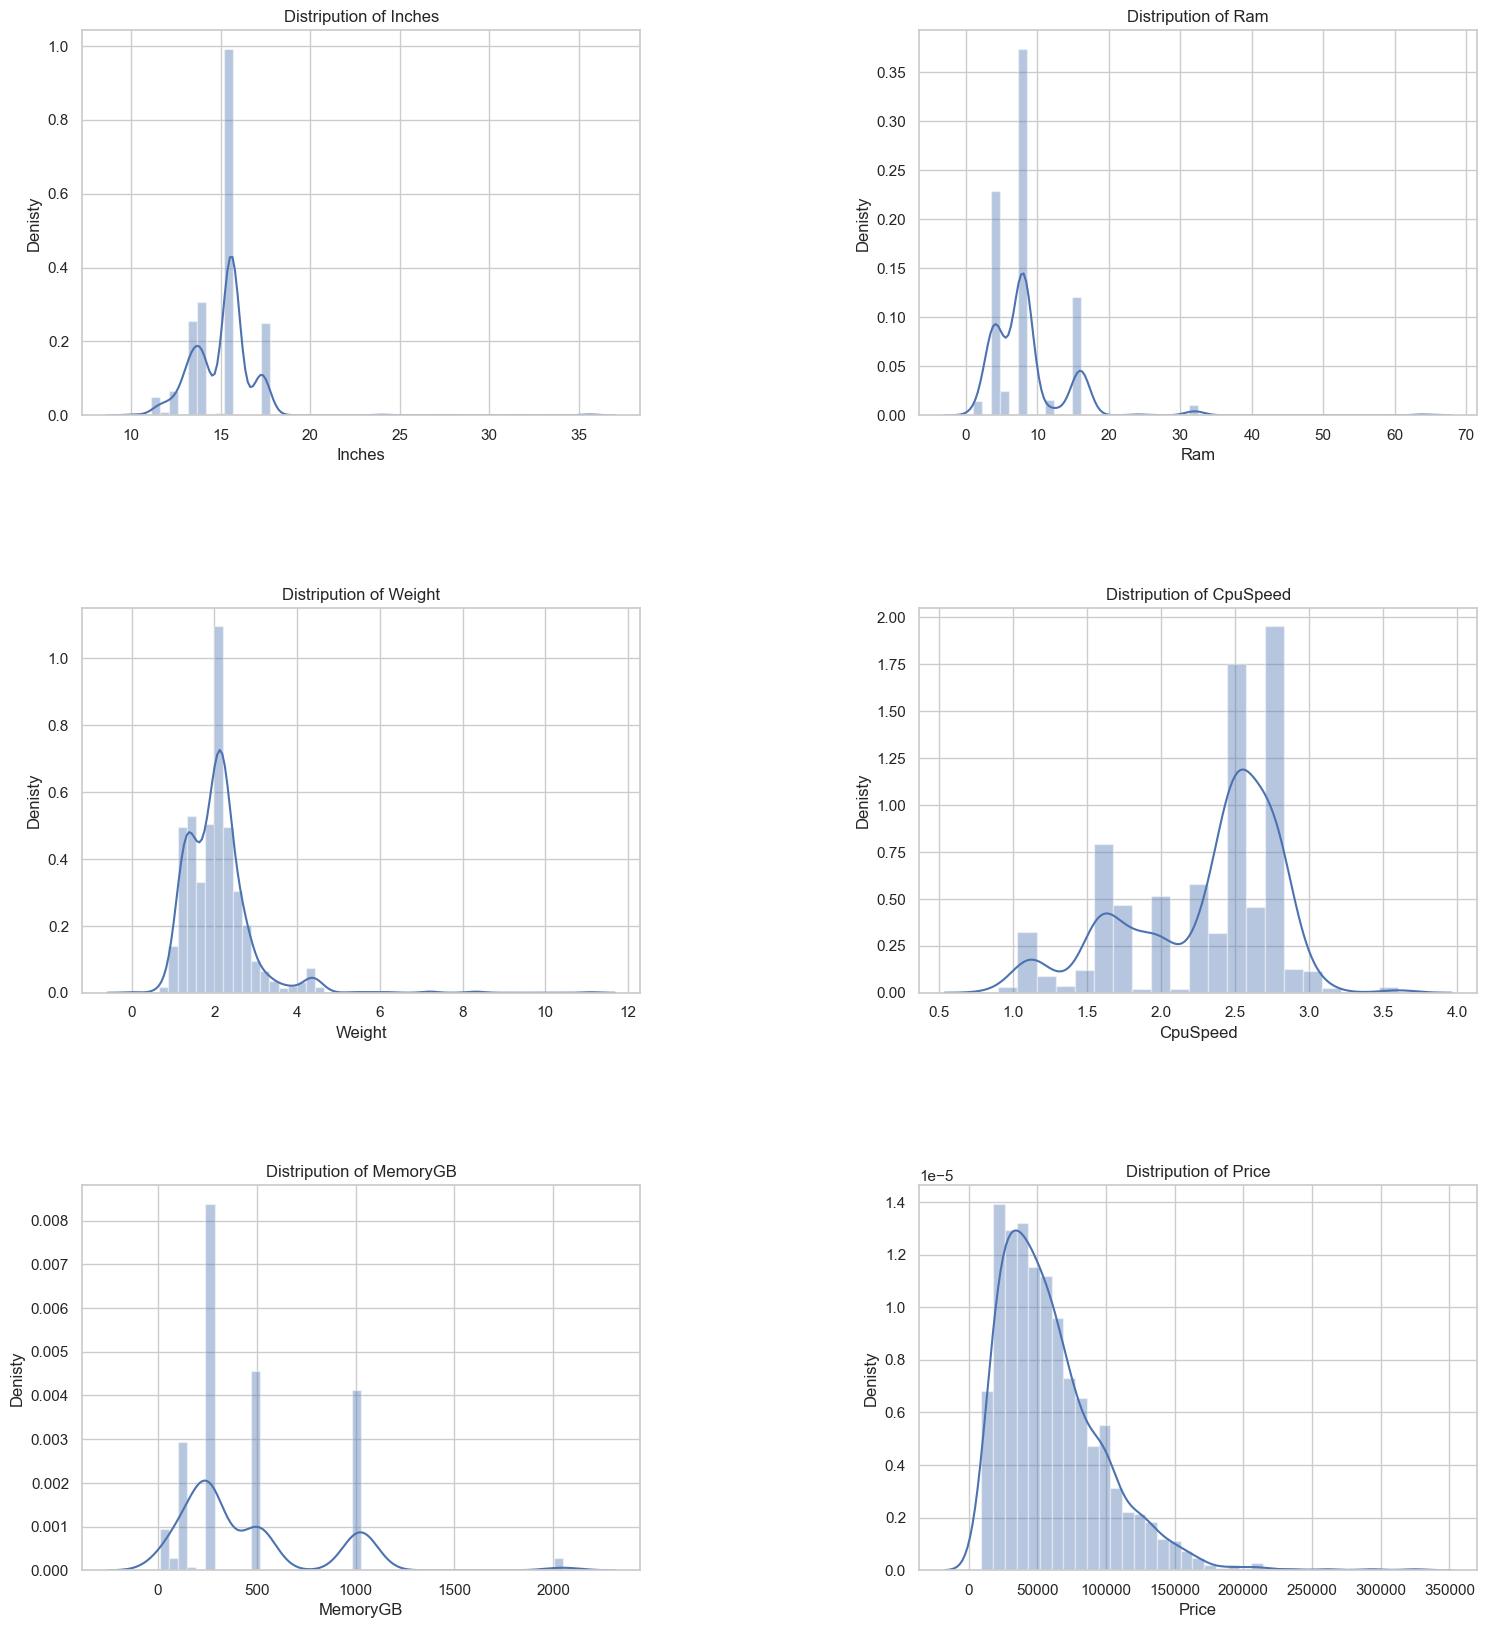

In [6]:
# Let's see the histograms for numeric variables along with the estimated distribution density line.

plt.figure(1, figsize=(18,20))
n=0
for cols in ['Inches', 'Ram', 'Weight', 'CpuSpeed', 'MemoryGB', 'Price']:
    n+=1 
    plt.subplot(3, 2, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[cols])
    plt.ylabel('Denisty')
    plt.title(f"Distripution of {cols}")
plt.show()

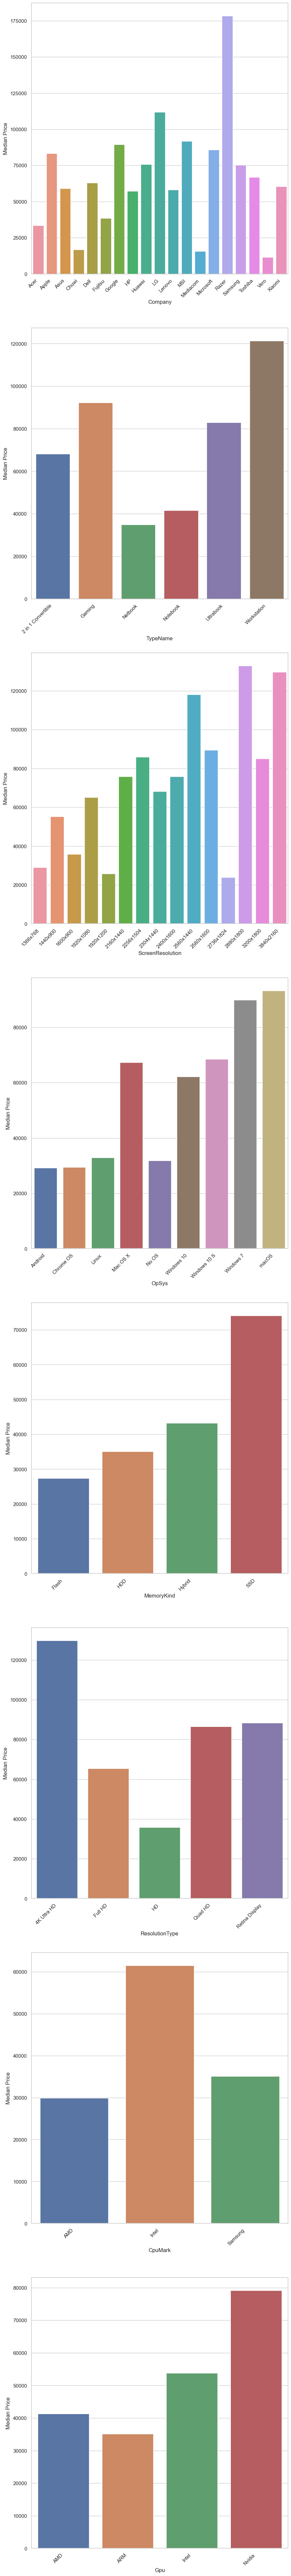

In [7]:
# Now let's look at the bar plots for categorical data, which will show how the median price in each class looks like. 
# We will use the median because 'Price' is not normally distributed and the mean could be misleading.

plt.figure(1, figsize=(10,100))
categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'MemoryKind', 'ResolutionType', 'CpuMark', 'Gpu']
n=0
for col in categorical_features:
    n += 1
    plt.subplot(8, 1, n)
    df_grouped = data.groupby(col)['Price'].mean().reset_index()
    sns.barplot(x=col, y="Price", data=df_grouped)
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Median Price")
plt.show()

#### Conclussions

Note that for each categorical features there is some price differentiation in its classes, 
which indicates that they may be important in the model.


## Linear regression model

We will adopt the strategy of first using all the features to build the models, 
and then we will remove the featuress that we suspect have no effect on the 'Price' variable. 
Then we will compare the results and assess the usefulness of the model.
For codding categorical features we will use LabelEncoder codding.

In [8]:
# Now we want remowe outliers from dataset:

numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight', 'Price']

for column in numeric_features:
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [14]:
# Requirements import and common things

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(type(data))

def label_codding(df, cat_features):
    encoder = LabelEncoder()
    df_cat = df[cat_features].copy()
    for column in cat_features:
        df_cat[column] = encoder.fit_transform(df_cat[column])
    return df_cat
    
def standard_scaler_codding(df, num_features):
    encoder = StandardScaler()
    df_num = df[num_features].copy()
    for column in num_features:
        df_num[column] = encoder.fit_transform(df_num[column].values.reshape(-1, 1))
    return df_num

def codding(df, cat_features, num_features, strategy_cat=None, strategy_num=None):
    """
    strategy_cat = [one_hot, label]
    strategy_num = [standard]
    """
    if strategy_cat == 'one_hot':
        df_one_hot = one_hot_codding(df, cat_features)
        df_num = standard_scaler_codding(df, num_features)
        X = pd.concat([df_one_hot, df_num], axis=1)
    else:
        df_label = label_codding(df, cat_features)
        df_num = standard_scaler_codding(df, num_features)
        X = pd.concat([df_label, df_num], axis=1)
    return X

def raport(model, X_train, X_test, y_train, y_test):
    print(f'Model score on train dataset: {model.score(X_train, y_train):.2f}')
    print(f'Model score on test dataset: {model.score(X_test, y_test):.2f}')
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Square Error (MSE): {mse:.2f}')
    mae = mean_absolute_error(y_test, predictions)
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    
    plt.scatter(y_test, predictions, s=15)
    plt.xlabel('Y Test(True Values)')
    plt.ylabel('Predicted Values')
    plt.plot(y_test, y_test, color='red', lw=1)
    plt.show()

    sns.displot((y_test-predictions),kde=True, bins=50);


<class 'pandas.core.frame.DataFrame'>


Model score on train dataset: 0.69
Model score on test dataset: 0.65
Mean Square Error (MSE): 346202005.15
Mean Absolute Error (MAE): 13876.50


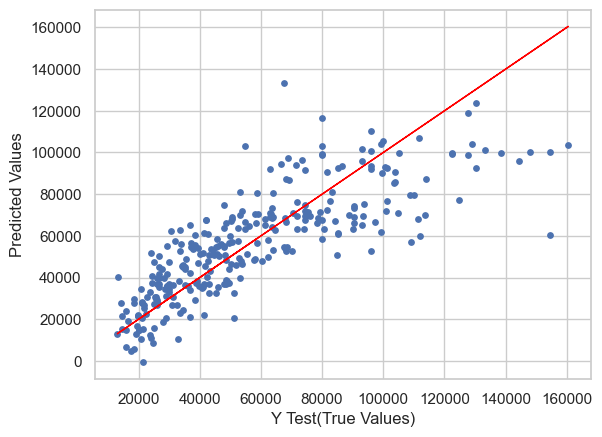

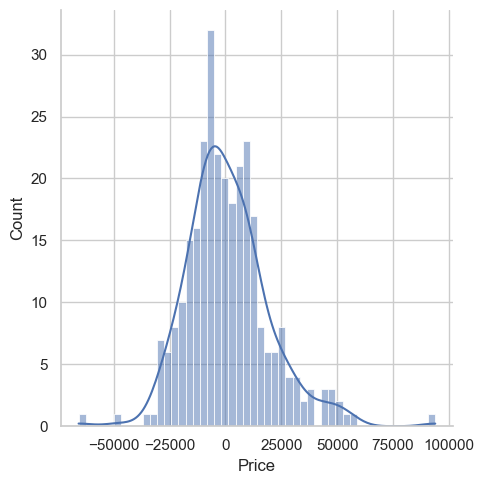

In [16]:
# We'll use all the variables.

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_1 = LinearRegression()

model_1.fit(X_train, y_train)

raport(model_1, X_train, X_test, y_train, y_test)

In [ ]:
# Obtaining features names
feature_names = categorical_features + numeric_features

# Obtaining coefficients values
coefficients = model_1.coef_

feature_and_coef = pd.DataFrame({'feature': feature_names, 'coef': coefficients}).sort_values('coef', ascending=False)

feature_and_coef


### Evaluation

We see that our model explains 69% of the cases in the training set and 65% of the cases in the test set. So our model is not overfitting, but the result is not ideal.

In the scatterplot of the actual price and the predicted price, we see that the model predicted the price well in most cases, except for a few outliers.

The residuals of the model, which were created as a result of subtracting the value of the predicted price from the actual price, have a normal distribution, which is illustrated by the residual density plot.

In [17]:
# We will use the RFECV feature selection method to find the optimal linear regression model. We use Label Encoder to codding 
# categorical data, becouse it's check wchich features are important.

from sklearn.feature_selection import RFECV

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y_ = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model = LinearRegression()
                         
rfecv = RFECV(estimator=model)

rfecv.fit(X_train, y_train)
                         
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Choceen features: {X.columns[rfecv.support_]}")                        
print("Features rank:", rfecv.ranking_)


Optimal number of features: 15
Choceen features: Index(['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys',
       'MemoryKind', 'CpuMark', 'Gpu', 'Touchscreen', 'IPS', 'Ram', 'CpuSpeed',
       'MemoryGB', 'Inches', 'Weight'],
      dtype='object')
Features rank: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Conclusions

We can see that the algorithm has indicated that the optimal linear model contains all the features.

Model score on train dataset: 0.62
Model score on test dataset: 0.57
Mean Square Error (MSE): 426322913.80
Mean Absolute Error (MAE): 15282.41


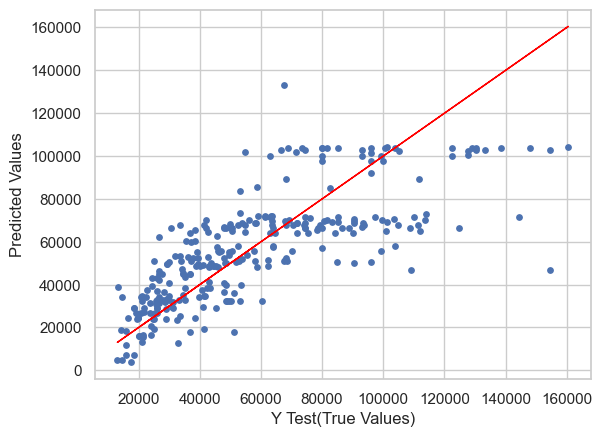

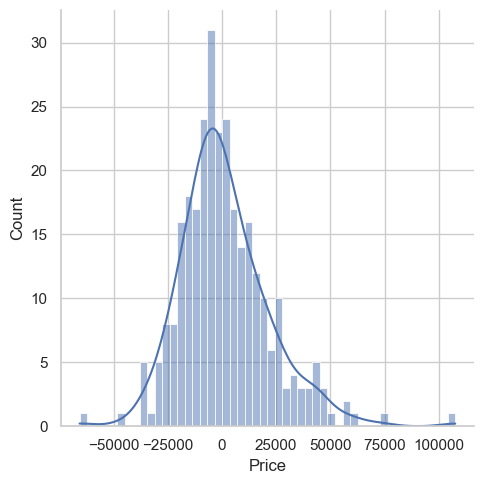

In [18]:
# Example: Linear Reression model with chosen features


categorical_features = ['MemoryKind', 'CpuMark', 'Gpu']
numeric_features = ['Ram', 'MemoryGB', 'CpuSpeed']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y_ = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_2 = LinearRegression()

model_2.fit(X_train, y_train)

raport(model_2, X_train, X_test, y_train, y_test)




We see that scores are worse.

## Random Forest Regression Model


Model score on train dataset: 0.97
Model score on test dataset: 0.78
Mean Square Error (MSE): 222799301.61
Mean Absolute Error (MAE): 10010.07


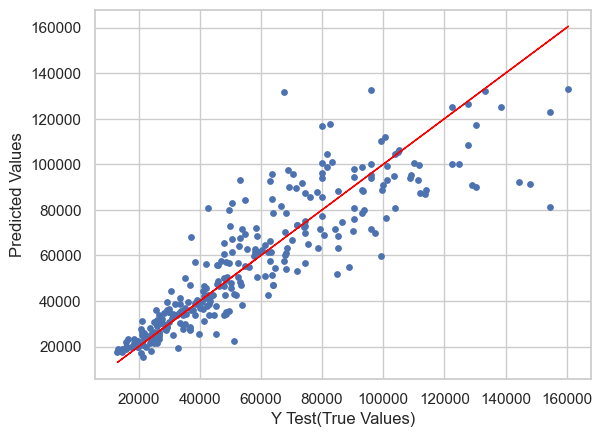

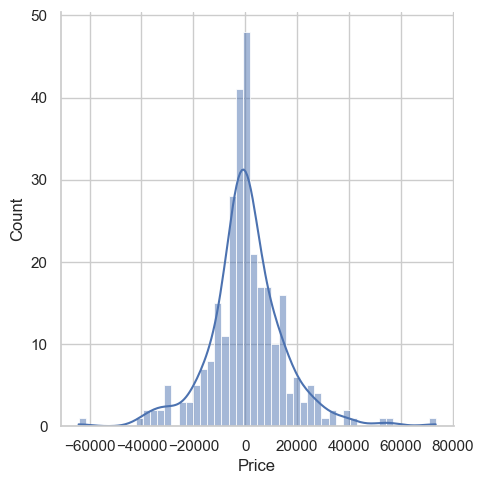

In [19]:
# Firs we develop model with all features and see results. 

categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'ResolutionType', 'OpSys', 'MemoryKind', 
                        'CpuMark', 'Gpu', 'Touchscreen', 'IPS']
numeric_features = ['Ram', 'CpuSpeed', 'MemoryGB', 'Inches', 'Weight']

X = codding(data, categorical_features, numeric_features, strategy_cat='label', strategy_num='standard')
y_ = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=555)

model_3 = RandomForestRegressor()

model_3.fit(X_train, y_train)

raport(model_3, X_train, X_test, y_train, y_test)

In [20]:
# Now we build model withaut feature: ScreenResolution. Information abaut resolution we have in other features. 
# And it will be easier to assess which variables have the greatest impact on the price.


# Uzyskanie nazw zmiennych
feature_names = categorical_features + numeric_features
# Uzyskanie wartości współczynników
importances = model_3.feature_importances_

feature_and_importances = pd.DataFrame({'feature': feature_names, 'importances': list(importances)}).sort_values('importances', ascending=False)
feature_and_importances

,feature,importances
10,Ram,0.556552
14,Weight,0.150376
11,CpuSpeed,0.071095
1,TypeName,0.031048
0,Company,0.030986
2,ScreenResolution,0.030833
12,MemoryGB,0.030599
13,Inches,0.022460
3,ResolutionType,0.021454
5,MemoryKind,0.016473


## SUMMARY AND RECOMENDATION